# Custom PyCaret Pipeline

This [Kaggle KERNAL]('https://www.kaggle.com/code/mpwolke/passive-aggressive-regressor-in-creditability/notebook') also helps alot for building custom Pipeline.

In [2]:
# Read in the car sales data
import pandas as pd
import numpy as np

car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

# View the first 5 rows of the car sales data
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [22]:
car_sales.shape

(950, 5)

In [3]:
# Get information about the car sales DataFrame
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [4]:
# Find number of missing values in each column
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
# Find the datatypes of each column of car_sales
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [6]:
# Remove rows with no labels (NaN's in the Price column)
car_sales.dropna(subset=["Price"], inplace=True)

### Building a Custom Pipeline

In [7]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

In [8]:
# Let's start with the categorical features.

# Define Doors features
door_feature = ["Doors"]

# Create Doors transformer Pipeline
door_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to 4
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [9]:
# import PyCaret for Setting up data
from pycaret.regression import *

In [15]:
s = setup(data=car_sales,target='Price',session_id=42,
         imputation_type='simple',numeric_imputation='median',
         categorical_imputation='missing',
         numeric_features=['Odometer (KM)'],
         categorical_features=['Make','Colour','Doors'],
         normalize=True,transformation=True,
          data_split_shuffle=True,
         custom_pipeline=[door_transformer])

,Description,Value
0,Session id,42
1,Target,Price
2,Target type,Regression
3,Data shape,"(950, 17)"
4,Train data shape,"(665, 17)"
5,Test data shape,"(285, 17)"
6,Numeric features,1
7,Categorical features,3
8,Rows with missing values,18.6%
9,Preprocess,True


In [16]:
print(s)

In [18]:
# X Features
s.get_config('X')

,Make,Colour,Odometer (KM),Doors
0,Toyota,White,149655.0,4.0
1,Toyota,Black,146848.0,NaN
2,Honda,Blue,42324.0,4.0
3,Honda,Blue,186146.0,4.0
4,Toyota,Green,168432.0,4.0
...,...,...,...,...
945,NaN,White,53531.0,4.0
946,Toyota,White,NaN,4.0
947,Honda,Blue,120448.0,4.0
948,Honda,Blue,37625.0,4.0


In [19]:
# y Features
s.get_config('y')

0      14650.0
1       7286.0
2      12531.0
3      18310.0
4      20497.0
        ...   
945     7802.0
946    23844.0
947    12392.0
948     6241.0
949     9953.0
Name: Price, Length: 950, dtype: float32

In [20]:
# X_train Features
s.get_config('X_train')

,Make_Toyota,Make_Honda,Make_Nissan,Make_BMW,Make_missing,Colour_White,Colour_Black,Colour_Blue,Colour_Green,Colour_missing,Colour_Red,Odometer (KM),Doors_4.0,Doors_missing,Doors_5.0,Doors_3.0
0,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,1.244143,-0.309115,-0.686468,-0.269408,-0.224840,-0.303239,0.301036,0.502349,-0.239236,-0.288205,-0.275775
1,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,3.235045,-0.686468,-0.269408,-0.224840,-0.303239,0.261758,-1.990650,4.179979,-0.288205,-0.275775
2,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.224840,-0.303239,-1.364437,0.502349,-0.239236,-0.288205,-0.275775
3,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.224840,-0.303239,0.799042,0.502349,-0.239236,-0.288205,-0.275775
4,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,-0.686468,3.711843,-0.224840,-0.303239,0.560062,0.502349,-0.239236,-0.288205,-0.275775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,-0.686468,-0.269408,4.447612,-0.303239,1.227874,0.502349,-0.239236,-0.288205,-0.275775
661,-0.766232,-0.632456,-0.492941,2.938993,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.224840,-0.303239,1.567799,-1.990650,-0.239236,3.469757,-0.275775
662,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,1.244143,-0.309115,-0.686468,-0.269408,-0.224840,-0.303239,0.932925,0.502349,-0.239236,-0.288205,-0.275775
663,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.224840,-0.303239,0.067335,-1.990650,4.179979,-0.288205,-0.275775


In [21]:
# X_test Features
s.get_config('X_test')

,Make_Toyota,Make_Honda,Make_Nissan,Make_BMW,Make_missing,Colour_White,Colour_Black,Colour_Blue,Colour_Green,Colour_missing,Colour_Red,Odometer (KM),Doors_4.0,Doors_missing,Doors_5.0,Doors_3.0
665,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,-0.423476,0.502349,-0.239236,-0.288205,-0.275775
666,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,3.235045,-0.686468,-0.269408,-0.22484,-0.303239,-1.839816,0.502349,-0.239236,-0.288205,-0.275775
667,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,0.951923,0.502349,-0.239236,-0.288205,-0.275775
668,-0.766232,-0.632456,2.028641,-0.340253,-0.217357,-0.803766,-0.309115,-0.686468,3.711843,-0.22484,-0.303239,1.443116,0.502349,-0.239236,-0.288205,-0.275775
669,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,3.235045,-0.686468,-0.269408,-0.22484,-0.303239,1.393012,0.502349,-0.239236,-0.288205,-0.275775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,-0.766232,-0.632456,-0.492941,-0.340253,4.600725,1.244143,-0.309115,-0.686468,-0.269408,-0.22484,-0.303239,-1.166735,0.502349,-0.239236,-0.288205,-0.275775
946,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,1.244143,-0.309115,-0.686468,-0.269408,-0.22484,-0.303239,0.071968,0.502349,-0.239236,-0.288205,-0.275775
947,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,-0.115725,0.502349,-0.239236,-0.288205,-0.275775
948,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,-1.450431,0.502349,-0.239236,-0.288205,-0.275775


In [23]:
# Initialize Models

init_models = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,5785.0686,50636941.5390,7074.4315,0.3030,0.4917,0.4950,0.0280
llar,Lasso Least Angle Regression,5787.2868,50601915.6009,7073.8170,0.3026,0.4923,0.4941,0.0480
ridge,Ridge Regression,5794.2479,50737704.8783,7083.8871,0.3004,0.4934,0.4943,0.0390
lasso,Lasso Regression,5794.7333,50741784.9478,7084.2402,0.3003,0.4935,0.4943,0.0540
lr,Linear Regression,5800.4544,50751841.2644,7084.9289,0.3001,0.4922,0.4943,1.0580
lar,Least Angle Regression,5806.1502,50990573.5592,7097.4129,0.2990,0.4946,0.4961,0.0360
huber,Huber Regressor,5808.7776,51171305.5405,7110.2406,0.2958,0.4915,0.4882,0.0310
ada,AdaBoost Regressor,5753.6143,51292513.6031,7121.4419,0.2928,0.4956,0.5070,0.0350
en,Elastic Net,5853.8415,52307854.0997,7181.0693,0.2842,0.4992,0.5087,0.0470
gbr,Gradient Boosting Regressor,5817.2051,52583414.9558,7206.3754,0.2771,0.4934,0.4939,0.0410


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Create Model

In [24]:
br = create_model(estimator='br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6605.9089,61914497.2901,7868.5766,0.3365,0.5478,0.5918
1,5713.1608,42761349.8942,6539.2163,0.1766,0.5220,0.5631
2,5459.7578,43246635.5656,6576.2174,0.2983,0.4817,0.4829
3,6359.8240,63786866.4303,7986.6680,0.3348,0.4973,0.5094
4,6503.8109,67289590.1726,8203.0232,0.3308,0.4838,0.4738
5,5611.6828,49900350.8040,7064.0180,0.3011,0.5358,0.5243
6,4910.5772,37202896.3784,6099.4177,0.4000,0.4468,0.4342
7,5002.2192,37412389.1269,6116.5668,0.2716,0.4672,0.4765
8,6200.6964,60143891.0321,7755.2493,0.3850,0.4734,0.4416


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune Model

In [29]:
tuned_br = tune_model(estimator=br,optimize='R2',n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6605.9070,61914476.2319,7868.5752,0.3365,0.5478,0.5918
1,5713.1601,42761328.6386,6539.2147,0.1766,0.5220,0.5631
2,5459.7622,43246666.3631,6576.2198,0.2983,0.4817,0.4829
3,6359.8228,63786885.9107,7986.6693,0.3348,0.4973,0.5094
4,6503.8163,67289662.7704,8203.0277,0.3308,0.4838,0.4738
5,5611.6769,49900206.6530,7064.0078,0.3011,0.5358,0.5243
6,4910.5742,37202855.3452,6099.4143,0.4000,0.4468,0.4342
7,5002.2153,37412364.7083,6116.5648,0.2716,0.4672,0.4765
8,6200.6983,60143990.0902,7755.2556,0.3850,0.4734,0.4416


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
tuned_br = tune_model(estimator=br,optimize='R2',choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6605.9128,61914541.9646,7868.5794,0.3365,0.5478,0.5918
1,5713.1622,42761394.9820,6539.2198,0.1766,0.5220,0.5631
2,5459.7486,43246570.5335,6576.2125,0.2983,0.4817,0.4829
3,6359.8266,63786825.1474,7986.6655,0.3348,0.4973,0.5094
4,6503.7996,67289437.1102,8203.0139,0.3308,0.4838,0.4738
5,5611.6953,49900656.8236,7064.0397,0.3011,0.5358,0.5243
6,4910.5838,37202983.1445,6099.4248,0.4000,0.4468,0.4342
7,5002.2276,37412440.7781,6116.5710,0.2716,0.4672,0.4765
8,6200.6924,60143682.9419,7755.2358,0.3850,0.4734,0.4416


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Ensemble Model

In [45]:
# ensemble model
boosting_br = ensemble_model(estimator=br,optimize='R2',method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6772.1290,64170294.2507,8010.6363,0.3123,0.5595,0.6131
1,5737.7513,43922525.5429,6627.4072,0.1542,0.5269,0.5739
2,5336.8501,41878258.3670,6471.3413,0.3205,0.4760,0.4775
3,6378.6598,63413558.0417,7963.2630,0.3387,0.5025,0.5237
4,6390.0690,64190948.1984,8011.9254,0.3616,0.4843,0.4795
5,5548.9839,49185071.7233,7013.2069,0.3111,0.5467,0.5300
6,4971.7107,38658489.6568,6217.5952,0.3765,0.4534,0.4450
7,5216.1886,40633384.5330,6374.4321,0.2089,0.4867,0.5065
8,6188.4925,58065830.0380,7620.0938,0.4062,0.4789,0.4523


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [44]:
# ensemble model with choose_better
#boosting_br = ensemble_model(estimator=br,optimize='R2',choose_better=True)

## Analyze Model Performance and Other Metrics

In [46]:
# evaluate Estimator
evaluate_model(boosting_br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

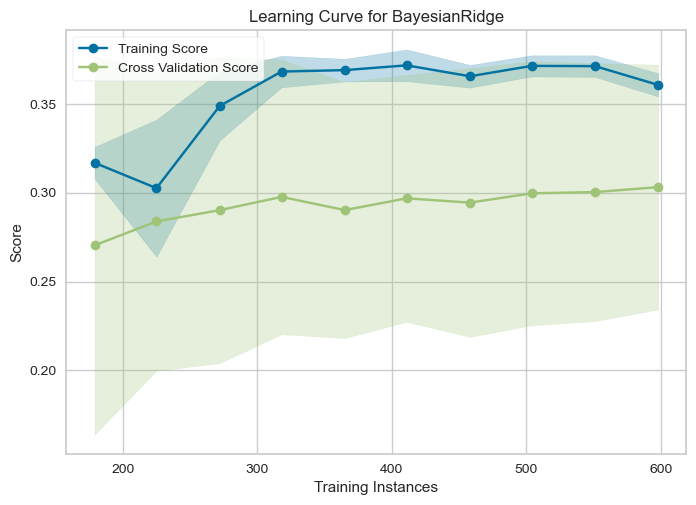

In [39]:
# plot Learnign curive of the estimator
plot_model(br, plot = 'learning')

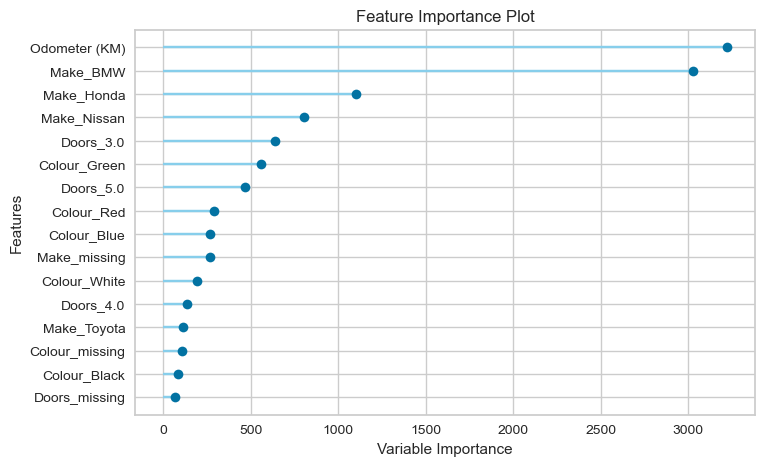

In [41]:
# plot Top(10) features of the estimator
plot_model(br, plot = 'feature_all')

## Deploy Model

In [50]:
# predict on hold-out
predict_model(estimator=boosting_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,5838.8175,51134864.6520,7150.8646,0.2690,0.4969,0.4959


,Make_Toyota,Make_Honda,Make_Nissan,Make_BMW,Make_missing,Colour_White,Colour_Black,Colour_Blue,Colour_Green,Colour_missing,Colour_Red,Odometer (KM),Doors_4.0,Doors_missing,Doors_5.0,Doors_3.0,Price,prediction_label
665,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,-0.423476,0.502349,-0.239236,-0.288205,-0.275775,10547.0,18677.477120
666,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,-0.803766,3.235045,-0.686468,-0.269408,-0.22484,-0.303239,-1.839816,0.502349,-0.239236,-0.288205,-0.275775,17940.0,22619.800163
667,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,0.951923,0.502349,-0.239236,-0.288205,-0.275775,12950.0,11379.673812
668,-0.766232,-0.632456,2.028641,-0.340253,-0.217357,-0.803766,-0.309115,-0.686468,3.711843,-0.22484,-0.303239,1.443116,0.502349,-0.239236,-0.288205,-0.275775,5905.0,6554.620198
669,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,3.235045,-0.686468,-0.269408,-0.22484,-0.303239,1.393012,0.502349,-0.239236,-0.288205,-0.275775,9826.0,9145.077155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,-0.766232,-0.632456,-0.492941,-0.340253,4.600725,1.244143,-0.309115,-0.686468,-0.269408,-0.22484,-0.303239,-1.166735,0.502349,-0.239236,-0.288205,-0.275775,7802.0,20834.437585
946,1.305087,-0.632456,-0.492941,-0.340253,-0.217357,1.244143,-0.309115,-0.686468,-0.269408,-0.22484,-0.303239,0.071968,0.502349,-0.239236,-0.288205,-0.275775,23844.0,16577.484283
947,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,-0.115725,0.502349,-0.239236,-0.288205,-0.275775,12392.0,14930.162650
948,-0.766232,1.581139,-0.492941,-0.340253,-0.217357,-0.803766,-0.309115,1.456731,-0.269408,-0.22484,-0.303239,-1.450431,0.502349,-0.239236,-0.288205,-0.275775,6241.0,19211.163236


In [51]:
# finalize a model
finalize_model(estimator=boosting_br)

Pipeline(memory=Memory(location=C:\Users\ITLAND~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Odometer (KM)'],
                                    transformer=SimpleImputer(strategy='median'))),
                ('categorical_imputer',
                 TransformerWrapper(include=['Make', 'Colour', 'Doors'],
                                    transformer=SimpleImputer(fill_value='missing',
                                                              strategy='constant'))),
                ('onehot...
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('custom_step_0',
                 TransformerWrapper(transformer=Pipeline(steps=[('imputer',
                                                                 SimpleImputer(fill_value=4,
                                                       

In [52]:
# save pipeline of the finalized estimator
save_model(boosting_br, 'boosting_br-22-12-03')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\ITLAND~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Odometer (KM)'],
                                     transformer=SimpleImputer(strategy='median'))),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Make', 'Colour', 'Doors'],
                                     transformer=SimpleImputer(fill_value='missing',
                                                               strategy='constant'))),
                 ('onehot...
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('custom_step_0',
                  TransformerWrapper(transformer=Pipeline(steps=[('imputer',
                                                                  SimpleImputer(fill_value=4,
                                         

In [53]:
# save config
save_config('boosting_br-22-12-03-config')

## Create Web API for testing

In [55]:
# # create api
# create_api(boosting_br, 'boosting_br_api')

# # run api
# !python boosting_br_api.py

In [56]:
# # create app
# create_app(boosting_br)